In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from scipy.io import loadmat
import os
import numpy as np
import pandas as pd
from quad import loadQuad, Quads #custom class for quad data
import tdt
import matplotlib.pyplot as plt

### Load data for given animal/date 
(Diego = Subj. 1, Pacho = Subj. 2)

In [3]:
quad.ml2_dat_list[0]['Trial2'].keys()

In [4]:
# for animal, dates_list in date_animal_dict.items():
#     for date in dates_list:
#         print(f'###### Doing {animal}, {date} ######')
#         quad = loadQuad(animal,date)

read from t=0s to t=6441.96s


/data3/code/quadrilaterals/quad.py:341: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  session_df = pd.concat([session_df,new_entry], ignore_index=True)
/data3/code/quadrilaterals/quad.py:344: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  full_df = pd.concat([full_df,session_df], ignore_index=True)


In [4]:
animal = 'Diego'
date = '251118'


In [19]:
#NOTE: Change paths to local dirs in this function >>
quad = loadQuad(animal, date)

read from t=0s to t=4508.89s


/home/danhan/code/quadrilaterals/quad.py:346: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  
/home/danhan/code/quadrilaterals/quad.py:349: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  sess_offset += self._session_durations[session_ind]


### Check out data structures
- ```quad.prettyBeh``` is the data loaded out of monkey logic

- ```quad.prettyTdt``` is the raw data from our tdt recording system
    - This includes LFP and raw voltage signal but these are not included for sake of file sizes

- ```quad.Dat``` is the merged dataframe, pulls information from Beh and combines it with timing precision in Tdt

- ```quad.SpikeTimes``` is dataframe with spike times loaded from kilosort. These have been automatically clustered by ks and manually curated for 'questionable' spikes.

** All timing relating things are handled automatically to align event codes with kilosort spike times. Note that 'photodiode_time' in Tdt/Dat is the most correct timing to align with kilosort. 

** 'sample_index' is also the most accurate indexing variable, with one 'sample_index' per sample that the monkey actually saw (whether they held fixation or not). Sample index DOES NOT include cases where no sample was shown (i.e. broke fixation during the 200ms fixation period). In the tdt data you will see instances of this where it looks like 'fix_cue' followed immediately by 'sample_off' and 'timeout'. The fact that it says 'sample_off' (even with no 'sample_on') is just an unintended part of the monkeylogic code (i.e. it runs toggleobject(sample,'status','off') whether or not there is a toggleobject(sample,'status,'on)).

In [5]:
quad.prettyBeh

,trial_ml2,stim_index,stim_name,fixation_success_binary,beh_session,block_num,condition
0,2,0,shape-rightKite_version-reference_dil-4_rot-2,True,0.0,1.0,1.0
1,2,1,shape-rightKite_version-reference_dil-1_rot-3,True,0.0,1.0,1.0
2,2,2,shape-rightKite_version-reference_dil-6_rot-1,True,0.0,1.0,1.0
3,2,3,shape-rightKite_version-reference_dil-3_rot-3,True,0.0,1.0,1.0
4,2,4,shape-rightKite_version-reference_dil-1_rot-1,True,0.0,1.0,1.0
...,...,...,...,...,...,...,...
3483,91,3483,shape-square_version-reference_dil-4_rot-5,False,0.0,8.0,88.0
3484,91,3484,shape-square_version-reference_dil-4_rot-5,True,0.0,8.0,88.0
3485,91,3485,shape-square_version-reference_dil-5_rot-1,True,0.0,8.0,88.0
3486,91,3486,shape-square_version-reference_dil-2_rot-3,True,0.0,8.0,88.0


In [6]:
quad.prettyTdt

,trial_ml2,stim_index,code_type,on,off,photodiode_time
0,1,NaN,trial_start,98.145239,98.174075,98.159657
1,1,NaN,fix_cue,98.174075,98.858476,98.196847
2,1,NaN,sample_off,98.858476,98.891121,98.898737
3,1,NaN,timeout,98.891121,100.108370,98.898737
4,1,NaN,trial_end_blue,100.108370,102.094070,100.116724
...,...,...,...,...,...,...
16451,92,NaN,stim_in_cond_0,5907.448832,5907.597230,5907.488322
16452,92,NaN,sample_off,5907.597230,5907.630653,5907.635778
16453,92,NaN,timeout,5907.630653,5908.847862,5907.635778
16454,92,NaN,trial_end_blue,5908.847862,5910.832456,5908.855731


In [7]:
quad.Dat

,trial_ml2,stim_index,stim_name,fixation_success_binary,beh_session,block_num,condition,code_type,on,off,photodiode_time
0,2,0,shape-rightKite_version-reference_dil-4_rot-2,True,0.0,1.0,1.0,sample_on,111.630828,111.633859,111.673342
1,2,1,shape-rightKite_version-reference_dil-1_rot-3,True,0.0,1.0,1.0,sample_on,112.681370,112.682885,112.706517
2,2,2,shape-rightKite_version-reference_dil-6_rot-1,True,0.0,1.0,1.0,sample_on,113.715200,113.717084,113.757387
3,2,3,shape-rightKite_version-reference_dil-3_rot-3,True,0.0,1.0,1.0,sample_on,114.749071,114.750710,114.791545
4,2,4,shape-rightKite_version-reference_dil-1_rot-1,True,0.0,1.0,1.0,sample_on,115.782902,115.784253,115.824720
...,...,...,...,...,...,...,...,...,...,...,...
3483,91,3483,shape-square_version-reference_dil-4_rot-5,False,0.0,8.0,88.0,sample_on,5897.458811,5897.460040,5897.500636
3484,91,3484,shape-square_version-reference_dil-4_rot-5,True,0.0,8.0,88.0,sample_on,5900.393595,5900.394701,5900.415350
3485,91,3485,shape-square_version-reference_dil-5_rot-1,True,0.0,8.0,88.0,sample_on,5901.427466,5901.428613,5901.466219
3486,91,3486,shape-square_version-reference_dil-2_rot-3,True,0.0,8.0,88.0,sample_on,5902.461338,5902.462935,5902.500377


In [8]:
tdt_stim_inds = quad.prettyTdt['stim_index'].dropna().to_numpy()
beh_stim_inds = quad.prettyBeh['stim_index'].to_numpy()

In [9]:
quad.spikeTimes

,GOOD,Q,RSn,amps_wf,batch,chan,chan_global,clust,clust_before_merge,clust_group_id,...,isi_violation_pct,label_final,label_final_int,sharpiness,snr_aligned,snr_final,snr_not_aligned,times_sec_all,times_sec_all_BEFORE_REMOVE_DOUBLE,waveforms
0,1.0,0.7484179657354528,2.0,"[1260.0, 1403.0, 1619.0, 1419.0, 1154.0, 1002....",1.0,3.0,3.0,nan,6.0,nan,...,0.01350867775988549,mua,1.0,5.914460226457684,4.448681566749725,4.448681566749725,3.652378070867822,"[0.041123844211081645, 0.5103616522610331, 0.6...",nan,"[[102.0, 83.0, -69.0, 326.0, 246.0, 340.0, 285..."
1,1.0,0.4848577488201465,2.0,"[1128.0, 1600.0, 1063.0, 1066.0, 1196.0, 1321....",1.0,5.0,5.0,nan,7.0,nan,...,0.014118162448475677,mua,1.0,6.247974823715916,4.060592560592457,4.060592560592457,3.4553710243600038,"[0.059596806102712944, 0.1600716963913417, 0.2...",nan,"[[-24.0, 254.0, 245.0, 254.0, 316.0, 323.0, 40..."
2,1.0,0.34979742236434175,2.0,"[1044.0, 1192.0, 852.0, 964.0, 1098.0, 1418.0,...",1.0,11.0,11.0,nan,9.0,nan,...,0.011060675137267339,mua,1.0,5.8429652423162635,4.478713412060547,4.478713412060547,4.088919799555241,"[0.07913472810339615, 0.10657793091358012, 0.1...",nan,"[[635.0, 293.0, 141.0, 165.0, 38.0, -21.0, -32..."
3,True,0.19812319515818022,2.0,"[2983.0, 3180.0, 3086.0, 2905.0, 2540.0, 2965....",1.0,13.0,13.0,10.0,nan,1.0,...,0.018534257611572954,su,2.0,7.35669827913102,9.654450500464078,9.654450500464078,8.890137933535337,"[0.030310403103785275, 0.0620134463501769, 0.0...",None,"[[41.0, -20.0, 23.0, 7.0, -92.0, 17.0, 111.0, ..."
4,1.0,0.3777027193609625,2.0,"[2492.0, 1250.0, 2931.0, 3012.0, 1091.0, 3090....",1.0,13.0,13.0,nan,11.0,nan,...,0.04673059492244746,mua,1.0,7.491965046488764,4.834821925083664,4.834821925083664,3.6861627111623707,"[0.10907649116943269, 0.16494593689046394, 0.2...",nan,"[[312.0, 265.0, 108.0, 158.0, 334.0, 196.0, 29..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,1.0,0.5201089872392354,3.0,"[1647.0, 1479.0, 1055.0, 1216.0, 1088.0, 1159....",4.0,44.0,492.0,nan,58.0,nan,...,0.014210417990317586,mua,1.0,6.175174559394562,4.584016696439423,4.584016696439423,4.514801274300088,"[0.007045120721420361, 0.11137025140431374, 0....",nan,"[[-55.0, -73.0, 15.0, 119.0, 345.0, 136.0, 204..."
192,1.0,0.4360127519070932,3.0,"[1054.0, 1009.0, 1279.0, 1159.0, 1524.0, 1369....",4.0,57.0,505.0,nan,70.0,nan,...,0.01436628770250205,mua,1.0,5.92474643271407,4.0839109186504405,4.0839109186504405,3.400722581644503,"[0.053370885465178666, 0.13557761388314765, 0....",nan,"[[306.0, 352.0, 246.0, 362.0, 497.0, 145.0, 40..."
193,1.0,1.059682786637279,3.0,"[968.0, 1086.0, 1096.0, 1084.0, 1590.0, 1805.0...",4.0,58.0,506.0,nan,71.0,nan,...,0.014588412519077916,mua,1.0,6.081445622215331,4.6944247951457125,4.6944247951457125,4.138342248601481,"[0.07049216721839792, 0.5057331717870768, 0.63...",nan,"[[140.0, 101.0, -49.0, 226.0, 26.0, 1.0, -161...."
194,1.0,0.3214285714285714,2.0,"[2928.0, 3624.0, 2183.0, 2540.0, 3268.0, 3217....",3.0,51.0,179.0,nan,"[59.0, 61.0, 62.0]",nan,...,0.00032289312237649337,su,2.0,9.69881753172329,8.964098970775558,8.964098970775558,8.215774093092099,"[2.834964770300392, 5.1437982867249445, 6.3922...",nan,"[[-30.0, -60.0, 0.0, 139.0, -112.0, -216.0, -6..."


### Plotting!

I have included two plot functions, one to make a PSTH and one to make a raster. Functions have descriptions for use under definition. The main thing to know is what to do with ```params```

```params``` should be a dict formatted with a column name and a list of entries in that column you want to keep. The plotting functions will then filter the data to match those parameters. The PSTH plot also has a 'group_by' argument which you can use to group and average activity over different variables. Examples below.

** Note right now the plotting functions can only align to 'sample_on', the code shouldn't be too hard to write for other trial events, but wasn't sure if you would end up needing that functionality.

** All plotting functions return a dict of figs indexed by 'unit_index'. The titles have the channel number.

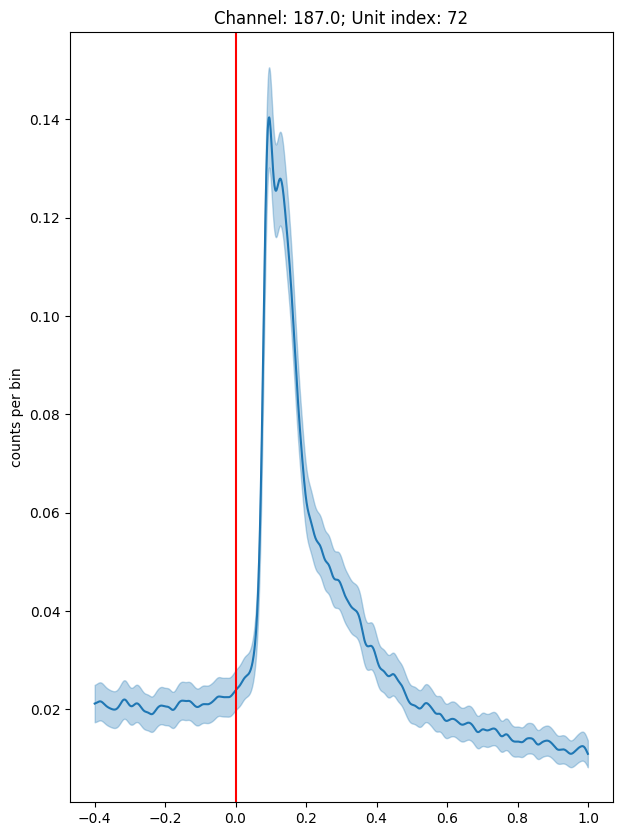

In [10]:
#Plot PSTH
conditions_plot = list(range(1,50))
params = {
    'condition': conditions_plot, #plot only for these conditions
    'fixation_success_binary': [True] #only plot when fixation is successful
    #You can filter by any column/value pair here, as long as the column is present in 'Dat'
}
channel = 187
fig_dict = quad.plotPSTH(channel, params, group_by='fixation_success_binary')

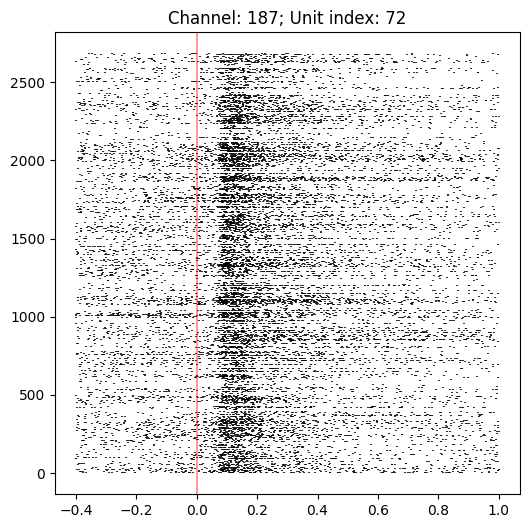

In [11]:
#Plot raster
channel = 187

params = {
'fixation_success_binary': [True]
# 'stim_index': quad.prettyBeh['stim_index'].to_numpy()[np.r_[0:200, -200:-1]]
}

fig_dict = quad.plotRaster(channel,params, window = (.4,1))


### Additional functions in quad.py

```filter_df``` = function to filter df given dict (structured like params above). Filters df by column/value pairs and returns the filter df. Useful for plotting.

```group_and_average``` = useful function for plotting, will take dat and group by unique values in a particular column and then average over 'spike_counts'. Right now, for example you could make one psth for each unique stimulus. If you wanted to do something like regular vs irregular though, you could edit this function to be more flexible to that.

```getChannelNumOrRegionName``` = A flexible function for getting the channels associated with a region or the region associated with a channel. You can look at the bottom of the file 'MAP_CHANNEL_TO_REGION' is a dict with all this info.